# Simple EDA and modeling as first steps towards thinking about this competiton

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import os
pd.plotting.register_matplotlib_converters()

from tqdm import tqdm

In [3]:
base_path = '.'
os.listdir(base_path)

['sample_submission.csv',
 'godaddy-microbusiness-eda.ipynb',
 'census_starter.csv',
 'test.csv',
 'sandbox.ipynb',
 'train.csv',
 'godaddy-microbusiness-eda.ipynb:Zone.Identifier']

Extract our data and take a look at some high-level items for each

In [24]:
train = pd.read_csv(base_path + '/train.csv')
census = pd.read_csv(base_path + '/census_starter.csv')
test = pd.read_csv(base_path + '/test.csv')
sub = pd.read_csv(base_path + '/sample_submission.csv')
train.shape, census.shape, test.shape, sub.shape

rename_dict = {
    'first_day_of_month': 'month',
    'cfips': 'code'

}

train = train.rename(columns=rename_dict)
test = test.rename(columns=rename_dict)
census = census.rename(columns=rename_dict)

census = census.set_index('code', drop=True)

# train['month'] = pd.to_datetime(train['month']).to_period('MS')
train = train.set_index('month')
train.index = pd.to_datetime(train.index)
train.index = train.index.to_period('M')
train.set_index('code')

test = test.set_index('month')
test.index = pd.to_datetime(test.index)
test.index = test.index.to_period('M')

train = train.drop(columns=['county', 'state']).sort_index(axis=0)

train['is_test'] = False
test['is_test'] = True

In [26]:
test

,row_id,code,is_test
month,,,
2022-11,1001_2022-11-01,1001,True
2022-11,1003_2022-11-01,1003,True
2022-11,1005_2022-11-01,1005,True
2022-11,1007_2022-11-01,1007,True
2022-11,1009_2022-11-01,1009,True
...,...,...,...
2023-06,56037_2023-06-01,56037,True
2023-06,56039_2023-06-01,56039,True
2023-06,56041_2023-06-01,56041,True


In [35]:
data = pd.concat([train, test]).sort_values(['code', 'month'])

In [36]:
data

,row_id,code,microbusiness_density,active,is_test
month,,,,,
2019-08,1001_2019-08-01,1001,3.007682,1249.0,False
2019-09,1001_2019-09-01,1001,2.884870,1198.0,False
2019-10,1001_2019-10-01,1001,3.055843,1269.0,False
2019-11,1001_2019-11-01,1001,2.993233,1243.0,False
2019-12,1001_2019-12-01,1001,2.993233,1243.0,False
...,...,...,...,...,...
2023-02,56045_2023-02-01,56045,NaN,NaN,True
2023-03,56045_2023-03-01,56045,NaN,NaN,True
2023-04,56045_2023-04-01,56045,NaN,NaN,True


In [19]:
# train = train.set_index('code', append=True)

In [20]:
train

,row_id,code,microbusiness_density,active
month,,,,
2019-08,1001_2019-08-01,1001,3.007682,1249
2019-08,21153_2019-08-01,21153,0.336289,33
2019-08,39057_2019-08-01,39057,5.733927,7490
2019-08,5063_2019-08-01,5063,1.865025,527
2019-08,54021_2019-08-01,54021,0.526540,37
...,...,...,...,...
2022-10,17181_2022-10-01,17181,1.637489,217
2022-10,47053_2022-10-01,47053,2.517291,939
2022-10,21229_2022-10-01,21229,1.592288,147


ConversionError: Failed to convert value(s) to axis units: (datetime.date(1970, 1, 1), datetime.date(1970, 1, 2))

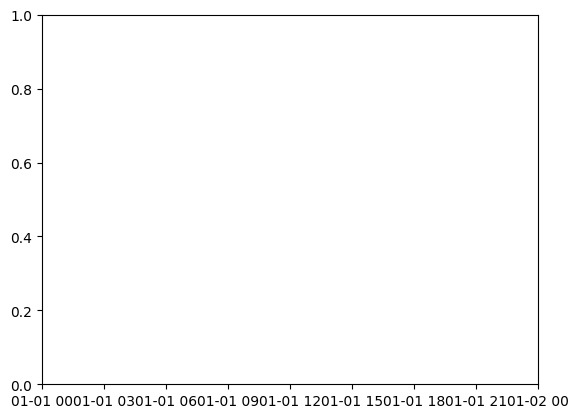

In [10]:
import matplotlib.pyplot as plt

plt.plot(train.loc[train.code == 1001, 'microbusiness_density'])

<AxesSubplot: xlabel='month'>

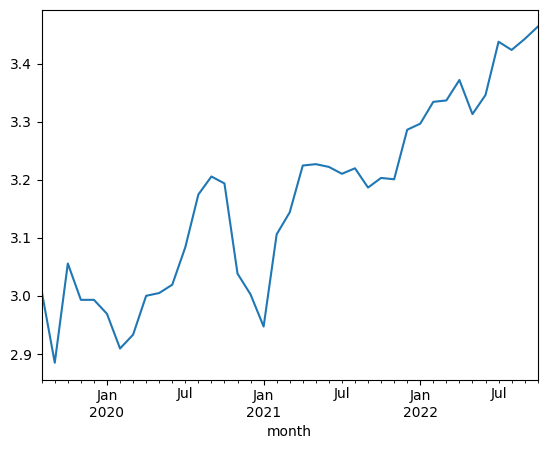

In [11]:
train.loc[train.code == 1001, 'microbusiness_density'].plot()

In [12]:
census_frames = {}



for code, row in tqdm(census.iterrows(), total=len(census)):
    frame = pd.DataFrame()
    for idx, val in row.items():
        col = '_'.join(idx.split('_')[:-1])
        year = idx.split('_')[-1]
        frame.loc[year, col] = val

    frame.index = pd.to_datetime(frame.index)
    frame.index = frame.index.to_period('Y')
    frame = frame.sort_index(axis=0).sort_index(axis=1)

    census_frames[code] = frame


100%|██████████| 3142/3142 [00:23<00:00, 134.27it/s]


<AxesSubplot: xlabel='month'>

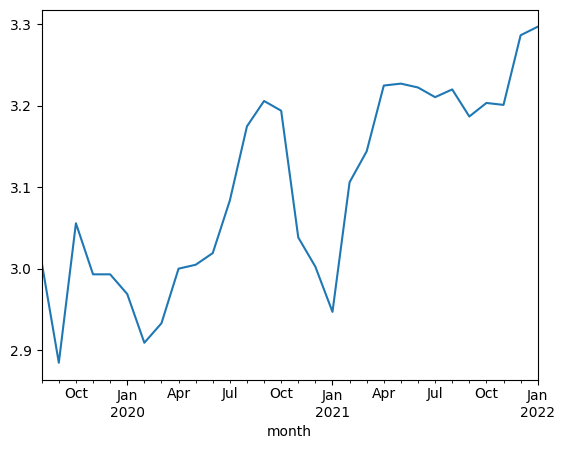

In [44]:
data.head(30).loc[:, 'microbusiness_density'].plot()

In [68]:
frame

,2017,2018,2019,2020,2021,code
pct_bb,71.1,73.3,76.8,79.7,81.3,NaN
,NaN,NaN,NaN,NaN,NaN,56045.0
pct_college,14.1,13.5,13.4,12.7,13.9,NaN
pct_foreign_born,3.8,4.1,1.7,2.3,1.6,NaN
pct_it_workers,0.6,0.6,0.0,0.0,0.0,NaN
median_hh_inc,59605.0,52867.0,57031.0,53333.0,65566.0,NaN


In [58]:
row.iteritems()

/tmp/ipykernel_627/97984508.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  row.iteritems()


In [53]:
row

'median_hh_inc_2021'

In [29]:
pd.to_datetime(train['month'])

0        2019-08-01
1        2019-09-01
2        2019-10-01
3        2019-11-01
4        2019-12-01
            ...    
122260   2022-06-01
122261   2022-07-01
122262   2022-08-01
122263   2022-09-01
122264   2022-10-01
Name: month, Length: 122265, dtype: datetime64[ns]

In [7]:
train.cfips.unique()

array([ 1001,  1003,  1005, ..., 56041, 56043, 56045])

In [12]:
train

,row_id,cfips,first_day_of_month
0,1001_2022-11-01,1001,2022-11-01
1,1003_2022-11-01,1003,2022-11-01
2,1005_2022-11-01,1005,2022-11-01
3,1007_2022-11-01,1007,2022-11-01
4,1009_2022-11-01,1009,2022-11-01
...,...,...,...
295,8105_2022-11-01,8105,2022-11-01
296,8107_2022-11-01,8107,2022-11-01
297,8109_2022-11-01,8109,2022-11-01
298,8111_2022-11-01,8111,2022-11-01


In [6]:
census_df.head(3)

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,74.5,78.1,81.8,85.1,87.9,1003,20.4,20.7,21.0,20.2,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
2,57.2,60.4,60.5,64.6,64.6,1005,7.6,7.8,7.6,7.3,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0


In [7]:
len(train_df.cfips.unique()), len(census_df.cfips.unique())

(3135, 3142)

So there should be a one to one match of cfips from the training dataframe to what's available in the census data -- we should add this information to our trianing data

In [8]:
# to confirm the statement above
unique_census_cfips = census_df.cfips.unique()
matched = [cfip in unique_census_cfips for cfip in train_df.cfips.unique()]
pd.Series(matched).sum()/len(matched)

1.0

In [9]:
test_df.head(3)

,row_id,cfips,first_day_of_month
0,1001_2022-11-01,1001,2022-11-01
1,1003_2022-11-01,1003,2022-11-01
2,1005_2022-11-01,1005,2022-11-01


So we get cfips information for testing....

as seen below we just need to predict the microbusiness density with the cfips information and the first day of the month information. 

In [12]:
sub_df.head(3)

,row_id,microbusiness_density
0,1001_2022-11-01,3.817671
1,1003_2022-11-01,3.817671
2,1005_2022-11-01,3.817671


Now lets look more closely at our training data

In [13]:
train_df.tail(5)

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
122260,56045_2022-06-01,56045,Weston County,Wyoming,2022-06-01,1.803249,101
122261,56045_2022-07-01,56045,Weston County,Wyoming,2022-07-01,1.803249,101
122262,56045_2022-08-01,56045,Weston County,Wyoming,2022-08-01,1.785395,100
122263,56045_2022-09-01,56045,Weston County,Wyoming,2022-09-01,1.785395,100
122264,56045_2022-10-01,56045,Weston County,Wyoming,2022-10-01,1.785395,100


Ok, so our county and state name are encoded by the CFIPS code: https://www.kaggle.com/competitions/godaddy-microbusiness-density-forecasting/discussion/372595

At test time, we get the (0) cfips and (1) first_day_of_the_month information and we needto predict the density. However we also have an active value -- which is the raw count of the microbusiness. Since it's not provided in the test set, we don't want to use it for training probably, but it may prove useful later once we start refining our model/data.

Since we have historical data in our training set (08/2019 --> 10/2022) and we're predicting on future data at test time (11/2022 --> 06/23), we may be able to use the active store count to determine trends in that value as it's changed over time.... (more on this later)

Interestingly, there are dates at test time that extend past the competition end date, wonder how that'll be confirmed at evaluation time

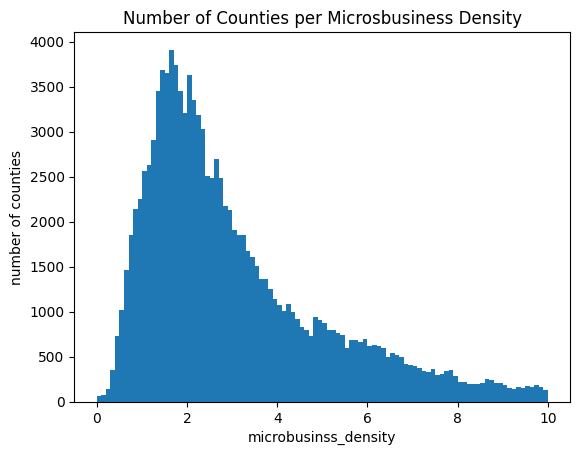

In [14]:
plt.hist(train_df.microbusiness_density, bins=100, range=(0,10))
plt.xlabel('microbusinss_density')
plt.ylabel('number of counties')
plt.title('Number of Counties per Microsbusiness Density');

What is microbusiness density?

Microbusinesses per 100 people over the age of 18 in the given county. This is the target variable. The population figures used to calculate the density are on a two-year lag due to the pace of update provided by the U.S. Census Bureau, which provides the underlying population data annually. 2021 density figures are calculated using 2019 population figures, etc.